[View in Colaboratory](https://colab.research.google.com/github/Ambati1304/sample_git_Learn/blob/master/linear_model_practice.ipynb)

## Importing Libraries

In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [3]:
tf.__version__

'1.7.0'

## Load Data

In [83]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [9]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [12]:
data.test.labels[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [0]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])

In [16]:
num_classes = len(np.unique(data.test.labels))
num_classes

10

In [0]:
img_size = 28

img_size_flat = img_size* img_size

img_shape = (img_size, img_size)

In [50]:
np.shape(data.train.images)

(55000, 784)

## Plotting Function

In [0]:
def plot_images(images,cls_true,cls_pred=None):
  
  assert len(images) == len(cls_true) ==9
  
  fig,axes = plt.subplots(3,3)
  fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
  
  for i, ax in enumerate(axes.flat):
    
    ax.imshow(images[i].reshape(img_shape),cmap = 'binary')
    
    if cls_pred is None:
      xlabel = "True: {0}".format(cls_true[i])
    else:
      xlabel = "True: {0}".format(cls_true[i],cls_pred[i])
      
    ax.set_xlabel(xlabel)
    
    ax.set_xticks([])
    ax.set_yticks([])
    
  plt.show()
    

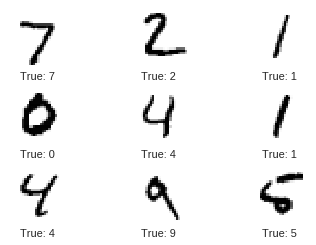

In [56]:
images = data.test.images[0:9]

cls_true = data.test.labels[0:9]

plot_images(images=images,cls_true = cls_true)



##TensorFlow Graph

In [0]:
x = tf.placeholder(tf.float32,[None,img_size_flat])

In [0]:
y_true = tf.placeholder(tf.float32,[None,num_classes])

In [0]:
y_true_cls = tf.placeholder(tf.int64,[None])

In [0]:
weights = tf.Variable(tf.zeros([img_size_flat,num_classes]))

In [0]:
biases = tf.Variable(tf.zeros([num_classes]))

## Model builiding

In [0]:
logits = tf.matmul(x,weights)+biases

In [0]:
y_pred = tf.nn.softmax(logits)

In [0]:
y_pred_cls = tf.argmax(y_pred,axis = 1)

In [0]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                        labels=y_true)

In [0]:
cost = tf.reduce_mean(cross_entropy)

## Optmization

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5).minimize(cost)

In [0]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [0]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

##TensorFlow Session

In [0]:
session = tf.Session()

In [0]:
session.run(tf.global_variables_initializer())

In [0]:
batch_size = 100

In [0]:

def optimize(num_iterations):
    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

In [0]:
feed_dict_test = {x: data.test.images,
                  y_true: data.test.labels,
                  y_true_cls: data.test.cls}

In [0]:
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [0]:

def print_confusion_matrix():
    # Get the true classifications for the test-set.
    cls_true = data.test.cls
    
    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [0]:
def plot_example_errors():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [0]:
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = session.run(weights)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [86]:

print_accuracy()

Accuracy on test-set: 9.8%


In [0]:
optimize(num_iterations=100)

In [88]:
print_accuracy()

Accuracy on test-set: 89.8%


In [92]:
optimize(num_iterations=1000)
print_accuracy()

Accuracy on test-set: 92.2%


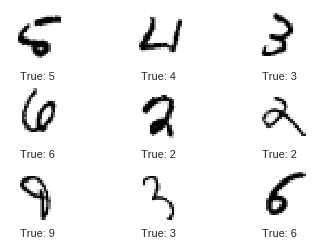

In [93]:
plot_example_errors()

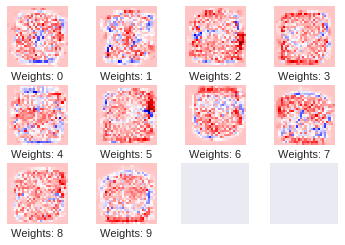

In [94]:
plot_weights()

[[ 948    0    0    4    1   16    4    3    4    0]
 [   0 1108    3    1    0    1    4    2   16    0]
 [   6   10  892   16    7    5   14   12   67    3]
 [   3    1   12  916    1   23    3   12   36    3]
 [   1    3    6    4  918    1    8    8    9   24]
 [   8    3    1   37    8  772   13    7   40    3]
 [   7    3    3    3    5   19  912    2    4    0]
 [   2    7   15    8    5    1    0  964    7   19]
 [   6    8    3   16    6   22    9    6  895    3]
 [   6    6    0    8   24   12    0   37   20  896]]


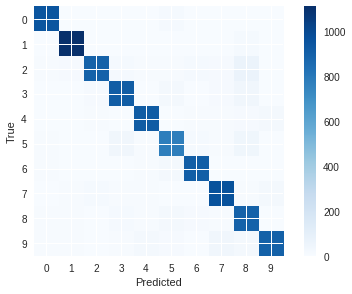

In [95]:
print_confusion_matrix()